# Statystyka opisowa - przedziały ufności

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

### Przedziały ufności

Przedział ufności dla dowolnego parametru $\theta$ populacji generalnej jest to przedział, który z zadanym dużym prawdopodobieństwem (tzw. poziomem ufności) pokrywa wartość szukanego parametru w populacji generalnej. Ogólnie przedział taki wyznaczony dla parametru $\theta$ oznacza się jako:

$$P(T_n^{(1)}<\theta<T_n^{(2)})=1-\alpha$$

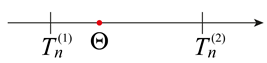

gdzie:
 - $(1-\alpha)$ - jest poziomem ufności, jego wartość jedt duża, tzn bliska jedności;
 - $T_n^{(1)}$,$T_n^{(2)}$ - oznacza granice przedziału ufności określone na podstawie $n$-elementowej próby;
 - $P()$ - oznacza prawdopodobieństwo;
 
Parametrem oznaczanym ogólnie jako $\theta$ może być średnia, odchylenie standardowe, mediana lub dowolny inny interesujący nas parameter.
 
Powyższy wzór interpretuje się standardowo jako prawdopobieństwo tego, że zmienna losowa przyjmie wartość z zadanego przedziału $[a,b]$: $P(a<X<b)$. Zmienną losową jest tu wartość oszacowania parametru $\theta$ na podstawie próby. Ponadto prawdopodobieństwo jest tu zadane w postaci ufności ($1-\alpha$), a to granice $a=T_n^{(1)}$ i $b=T_n^{(2)}$ mają zostać wyznaczone. 
 
Fakt, że przedział ufności pokrywa wartość poszukiwanego parametru z zadanym z góry prawdopodobieństwem oznacza, że to utworzony przedział może pokrywać pawdziwą wartość parametru z zadanym prawdopodobieństwem. Błędne natomiast jest stwierdzenie, że to parametr znajduje się w tym przedziale z zadanym prawdopodobieństwem. Parametr w populacji jest wartością ustaloną, natomiast my staramy się określić tę wartość na podstawie próby. Może się zdarzyć tak, że wartości zaobserwowane w próbie będą wartościami nietypowymi z perspektywy populacji, że określona na podstawie próby wartość parametru będzie bardzo odległa od prawdziwej wartości w populacji.

Przedział ufności z dużym prawdopodobieństwm $1-\alpha$ pokrywa prawdziwą wartość estymowanego parametru. Określenie "duże prawdopodobieństwo" oznacza tu wartość bliską jedności np.: $0{,}95$, $0{,}99$, $0{,}999$, itd. Oznacza to, że z prawdopodobieństwem $\alpha$ skonstruowany przedział ufności może nie pokryć prawdziwej wartości poszukiwanego parametru. 

Przedziały ufności wyprowadza sie na podstawie założeń co do rozkładu z jakiego pochodzi próba i innych dodatkowych zależności i twierdzeń. Wiąże się to z koniecznością spełnienia założeń przez próbę np. dotyczących rozkładu, z którego próba pochodzi, wielkości próby, itp. W związku z tym jest wiele wzorów służących do wyznaczenia przedziałów ufności dla tego samego parametru, w zależności od założeń, które spełnia próba.

#### Przykład: przedziały ufności dla średniej

Przykładowo przedziały ufności dla średniej oblicza się następująco:
 1. Przy założeniu, że próba pochodzi z rozkładu normalnego i znane jest odchylenie standardowe w populacji (wówczas rozmiar próby nie ma znaczenia):
 $$CI_\mu=\left[ \bar{x}-\frac{s}{\sqrt{n}}u_{1-\alpha/2} \; ; \;\bar{x}+\frac{s}{\sqrt{n}}u_{1-\alpha/2}\right]$$
  gdzie $u_{1-\alpha/2}$ jest kwantylem rozkładu normalnego standardowego $N(0,1)$
  
 
 2. Przy założeniu, że próba pochodzi z rozkładu normalnego i odchylenie standardowe jest obliczone na podstawie próby, a próba jest mała (w tym przypadku oznacza to mniej niż 30 elementów):
   $$CI_\mu=\left[ \bar{x}-\frac{\sigma}{\sqrt{n}}t_{n-1,1-\alpha/2} \; ; \;\bar{x}+\frac{\sigma}{\sqrt{n}}t_{n-1,1-\alpha/2}\right]$$
   gdzie $t_{n-1,1-\alpha/2}$ jest kwantylem rozkładu t-Studenta o $n-1$ stopniach swobody.
   
   
 3. Jeśli próba jest duża (powyżej 30 elementów) to na mocy centralnego tw. granicznego nie ma znaczenia z jakiego rozkładu pochodzi próba:
 $$CI_\mu=\left[ \bar{x}-\frac{s}{\sqrt{n}}u_{1-\alpha/2} \; ; \;\bar{x}+\frac{s}{\sqrt{n}}u_{1-\alpha/2}\right]$$
  gdzie $u_{1-\alpha/2}$ jest kwantylem rozkładu normalnego standardowego $N(0,1)$


Funkcja relaizująca powyższy schemat obliczeń mogłaby wyglądać następująco:

In [1]:
import numpy as np
import scipy.stats as st

In [2]:
def MeanCI(x,ConfidenceLevel=0.95,KnownStandardDeviation=None):
    m = st.tmean(x)    
    a = 1-ConfidenceLevel
    N = len(x)    
    if KnownStandardDeviation is None:
        if N <= 30:
            print("Obliczenie dla: próba mała pochodząca z rozkładu normalnego, nieznane odchylenie w populacji, próba mała")
            s = np.std(x)
            StudentTDistribution = st.t(N-1)
            ta = StudentTDistribution.ppf(ConfidenceLevel+a/2.)
            CI = ta*s/N**0.5
        else:
            print("Obliczenie dla próby dużej. Brak założeń co do rozkładu z którego pochodzi próba.")
            s = np.std(x)
            NormalDistribution = st.norm()
            ua = NormalDistribution.ppf(ConfidenceLevel+a/2.)
            CI = ua*s/N**0.5            
            
    else:
        print("Obliczenie dla próby pochodzącej z rozkładu normalnego, znane odchylenie standardowe w populacji.")
        NormalDistribution = st.norm()
        ua = NormalDistribution.ppf(ConfidenceLevel+a/2.)        
        CI = ua*KnownStandardDeviation/N**0.5
    
    return np.array( (m - CI,m + CI) )


Wygenerowanie wartości pochodzących z rozkładu normalnego, w celu przetestowania funkcji. W rzeczywistości będą to oczywiscie prawdziwe dane, co do których zwykle nie mamy pewności z jakiego rozkładu pochodzą.

In [3]:
x = st.norm(5,2).rvs(10) 
x

array([7.98313379, 6.2555613 , 3.04693398, 4.17202294, 3.40793896,
       2.76554841, 6.76646124, 4.40152709, 4.98924275, 1.34125945])

In [4]:
MeanCI(x,ConfidenceLevel=0.95)

Obliczenie dla: próba mała pochodząca z rozkładu normalnego, nieznane odchylenie w populacji, próba mała


array([3.13702146, 5.88890452])

Obliczenia ze znanym odchyleniem standardowym. Jest to przypadek czysto teoretyczny, ponieważ zazwyczaj odchylenie określa się na podstawie próby.

In [5]:
MeanCI(x,ConfidenceLevel=0.95,KnownStandardDeviation=2)

Obliczenie dla próby pochodzącej z rozkładu normalnego, znane odchylenie standardowe w populacji.


array([3.27337293, 5.75255306])

Wygenerownie próby dużej do testowania funkcji

In [6]:
xd = st.norm(5,2).rvs(100) 

In [7]:
MeanCI(xd,ConfidenceLevel=0.95)

Obliczenie dla próby dużej. Brak założeń co do rozkładu z którego pochodzi próba.


array([4.38834813, 5.25180186])

### Bootstrapowe przedziały ufności

Jak można zauważyć powyżej, obliczenia przedziałów ufności wiążą się z pewnymi trudnościami. Np. w przypadku analizy wartości średniej, gdy próba nie pochodzi z rozkładu normalnego i liczy poniżej 30 elementów (próba mała), lub gdy interesuje nas jakiś mało zbadany parametr (np. moment rzędu czwartego). W takim wypadku konieczne byłoby samodzielne wyprowadzenie wzoru na przedziały ufności dla typu rozkładu, z którego pochodzi próba. Jest to oczywiście bardzo niepraktyczne i trudne. W związku z tym używa się bardzo ogólnego podejścia zwanego metodą bootstrapową, które nie nakłada wyżej wymienionych wymagań w postaci założeń. 

Metody bootstrapowe polegają na wielokrotnym losowaniu wartości z próby i obliczaniu badanej statystyki. Dzięki temu możliwe jest zbudowanie rozkładu dowolnej badanej statystyki właściwie bez konieczności spełnienia żadnych założeń. Jedynie wielkość próby nie może być zbyt mała (powinna mieć przynajmniej 20-30 elementów). Metody bootstrapowe są podparte solidną teorią i dają solidne wyniki pomimo swojej elastyczności.

Obliczenie bootstrapowych przedziałów ufności realizuje się przy użyciu funkcji [`bootstrap()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html#scipy.stats.bootstrap). Pobiera ona wektor danych oraz funkcję obliczającą interesującą statystykę. Uwaga dane są pobierane jako krotka `(dane,)`. Argument `vectorized=False` związany jest z optymalizacją obliczeń. Jeśli jego wartosć zostanie ustawiona na `True`, obliczenia będą wydajniejsze, ale funkcja obliczająca statystykę będzie musiała spełniać dodatkowe warunki umożliwiające jej automatyczną wektoryzację.

#### Obliczenie bootstrapowych przedziałów ufności dla średniej

In [8]:
st.bootstrap((x,),st.tmean,confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.399659515092275, high=5.824509270421345), bootstrap_distribution=array([4.30773294, 5.0290305 , 6.26125577, ..., 3.47700764, 5.14890349,
       4.15696121]), standard_error=0.6180452055646898)

In [9]:
st.bootstrap((xd,),st.tmean, confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.385928403818519, high=5.253150591343285), bootstrap_distribution=array([4.36109159, 4.59941876, 4.84971629, ..., 5.34160567, 4.87996263,
       4.82908529]), standard_error=0.22127869068585185)

#### Obliczenie bootstrapowych przedziałów ufności dla odchylenia standardowego

In [10]:
st.bootstrap((x,),st.tstd,confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=1.4792183880737297, high=2.896010491224773), bootstrap_distribution=array([1.40155757, 2.03517105, 2.22241627, ..., 1.51437939, 1.4774215 ,
       1.31658596]), standard_error=0.3655817467248258)

In [11]:
st.bootstrap((xd,),st.tstd,confidence_level=0.95, vectorized=False)

BootstrapResult(confidence_interval=ConfidenceInterval(low=1.977297077577767, high=2.5075051174169545), bootstrap_distribution=array([2.03708708, 2.22969552, 2.20777283, ..., 2.17017115, 2.30616022,
       1.98610725]), standard_error=0.1342787973548828)

### Przedziały ufności - komentarz

Poniższy przykład w sposób graficzny przedstawia sytuację, w której dla wielu skonstruowanych przedziałów ufności część nie będzie pokrywać wartości parametru w populacji. Kolorem czerwonym przedstawiona jest średnia populacji generalnej. Skrypt generuje $K$ $N$-elementowych prób pochodzących z tego samego rozkładu i oblicza dla każdej z nich przedział ufności. Następnie prezentuje każdy z nich w postaci graficznej jako poziomą linię. Poziome linie oznaczają otrzymane kolejne przedziały ufności. Te które nie przecinają się z pionową linią czerwoną, nie pokrywają w ogóle prawdziwej wartości średniej w populacji.

Aby zbadać własności przedziałów ufności wykonaj eksperymenty, w których będziesz manipulować wartościami $K$, $N$ oraz $\alpha$.

In [12]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt

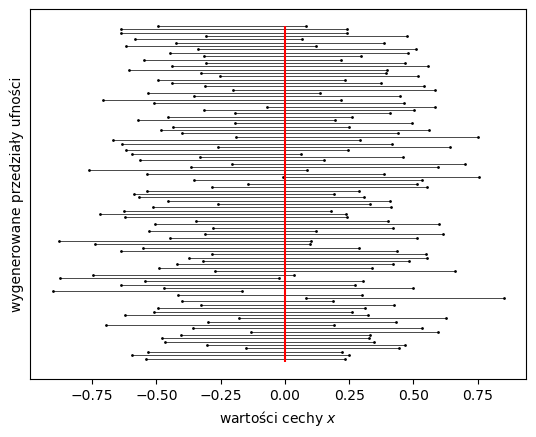

In [13]:
K = 100 # liczba prób
N = 25 # liczba elementów w próbie
a = 0.05

StudentTDistribution = st.t(N-1) # utworzenie obiektu rozkłady T-Studenta 
ta = StudentTDistribution.ppf(1-a/2.) # prawy kwanty rozkładu T-Studenta

CIm = []

for i in range(K):
    x = st.norm.rvs(size = N)
    
    m = st.tmean(x)
    s = st.tstd(x)
    CI = ta*s/N**0.5


    CIm.append((m-CI,m+CI))
    
CIm = np.array(CIm)

plt.hlines(range(1,K+1),CIm[:,0],CIm[:,1],color="black",linewidth=0.5)
plt.scatter(CIm[:,0],range(1,K+1),color="black",s=1)
plt.scatter(CIm[:,1],range(1,K+1),color="black",s=1)
plt.vlines(0,0,K,color="red")
plt.xlabel("wartości cechy $x$")
plt.yticks([])
plt.ylabel("wygenerowane przedziały ufności")
pass